In [31]:
import pandas as pd
import re #regular expression matching for removing unwanted columns by name
import natsort as ns #3rd party package for natural sorting

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df0_raw = pd.read_csv("5G_count_all.tsv", sep = '\t')

# Removing columns

Need to remove the following columns manually 

[total, ribo0, br1_QC, br2_QC] - these dont exist in the dataframe 

[5GB1_ferm_WT_QC, 5GB1_ferm_Ack_QC, 5GB1C_latelog_vial_TR2_QC, 5GB1_FM58_Td20h_TR1_QC, 5GB1_FM58_Td32h_TR3_QC, 5GB1_LTrecycle_TR1_QC, 5GB1_LTrecycle_TR1,
5GB1_vial_wLa_TR3, 5GB1_vial_woLa_TR2]

Need to remove all QC runs except FM34 which we will keep

In [3]:
to_remove = ["5GB1_ferm_WT_QC", "5GB1_ferm_Ack_QC", "5GB1C_latelog_vial_TR2_QC", 
             "5GB1_FM58_Td20h_TR1_QC", "5GB1_FM58_Td32h_TR3_QC", "5GB1_LTrecycle_TR1_QC", "5GB1_LTrecycle_TR1",
             "5GB1_vial_wLa_TR3", "5GB1_vial_woLa_TR2"] 

In [4]:
#manually removing some unwanted columns 
df1_raw_filtered = df0_raw.drop(df0_raw.loc[:,to_remove].columns, axis = 1)
#Isolating FM34 - Cu transition 3+ hours 
df1a_FM34_only = df1_raw_filtered.select(lambda x: re.search("FM34", x), axis=1)
#Removing all QC runs 
df1_raw_filtered = df1_raw_filtered.select(lambda x: not re.search("QC", x), axis=1)


In [5]:
#naturally sorting the filtered columns
to_sort = df1_raw_filtered.loc[:,"5GB1_FM69_t2_TR1":]

cols = list(ns.natsorted(to_sort.columns))
cols_sorted = to_sort[cols]

#adding descriptive columns
qualitative = df1_raw_filtered.loc[:, "locus_tag":"translation"]
df1b_filtered_sorted = pd.concat([qualitative, cols_sorted], axis=1)

#isolating FM40 (to be added back later for particular order )
df1b_FM40_only = df1b_filtered_sorted.select(lambda x: re.search("FM40", x), axis=1)

#removing FM40 (to be added right back at the end)
df1b_filtered_sorted = df1b_filtered_sorted.select(lambda x: not re.search("FM40", x), axis=1)

#Adding FM40
cleaned_up = pd.concat([df1b_filtered_sorted, df1b_FM40_only], axis=1)

#adding FM34
df2_cleaned_up = pd.concat([cleaned_up, df1a_FM34_only], axis=1)

#setting locus tag as index
df2_cleaned_up = df2_cleaned_up.set_index("locus_tag")

In [6]:
df2_cleaned_up.head()

,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,5GB1_FM12_TR1,5GB1_FM12_TR2,...,5GB1_FM40_T90m_TR2,5GB1_FM40_T150m_TR1_remake,5GB1_FM40_T180m_TR1,5GB1_FM34_T0_TR1_QC,5GB1_FM34_T3_TR3_QC,5GB1_FM34_T4_TR3_QC,5GB1_FM34_T5_TR2_QC,5GB1_FM34_T6_TR3_QC,5GB1_FM34_T7_TR3_QC,5GB1_FM34_T8_TR1_QC
locus_tag,,,,,,,,,,,,,,,,,,,,,
MBURv2_100001,conserved protein of unknown function,CDS,NaN,MBURv2,1965161,1965952,Evidence 4 : Homologs of previously reported g...,NaN,1913,1700,...,294,852,322,118,111,100,90,56,117,124
MBURv2_100002,conserved protein of unknown function,CDS,NaN,MBURv2,1966190,1966369,Evidence 4 : Homologs of previously reported g...,NaN,177,161,...,18,40,16,5,3,4,4,1,10,3
MBURv2_100003,protein of unknown function,CDS,NaN,MBURv2,1966931,1967041,Evidence 5 : No homology to any previously rep...,NaN,54,47,...,6,30,2,5,3,3,2,0,2,0
MBURv2_10001,protein of unknown function,CDS,NaN,MBURv2,116,289,Evidence 5 : No homology to any previously rep...,NaN,349,319,...,38,87,25,6,9,23,6,5,9,8
MBURv2_10002,KfrB,CDS,kfrB,MBURv2,497,844,NaN,NaN,1833,1199,...,667,1497,707,290,277,196,173,132,192,241


# Running TPM function on all the data columns


In [7]:
cd executible/

/Users/alexeygilman/repos/Cu_transition_time_course-/executible


In [8]:
%run Cu_transition_functionalized.py

In [9]:
columns = df2_cleaned_up.loc[:,"5GB1_FM12_TR1":].columns
df3_TPM = TPM_counts(df2_cleaned_up,"start_coord","end_coord",columns)

In [10]:
df3_TPM.describe()

,start_coord,end_coord,translation,5GB1_FM12_TR1,5GB1_FM12_TR2,5GB1_FM14_TR1,5GB1_FM14_TR2,5GB1_FM18_TR2,5GB1_FM18_TR3,5GB1_FM19_TR1,...,5GB1_FM40_T90m_TR2,5GB1_FM40_T150m_TR1_remake,5GB1_FM40_T180m_TR1,5GB1_FM34_T0_TR1_QC,5GB1_FM34_T3_TR3_QC,5GB1_FM34_T4_TR3_QC,5GB1_FM34_T5_TR2_QC,5GB1_FM34_T6_TR3_QC,5GB1_FM34_T7_TR3_QC,5GB1_FM34_T8_TR1_QC
count,4410.000000,4410.000000,0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2523912.507710,2524848.262585,NaN,226.699899,226.695346,226.697112,226.704348,226.594462,226.614222,226.653431,...,226.688681,226.691177,226.693393,226.703354,226.700279,226.705513,226.700812,226.707496,226.690055,226.701056
std,1471366.679738,1471365.070314,NaN,2608.104118,2618.586261,2226.261750,2589.462563,1246.618739,1229.043510,1759.623610,...,1219.717871,1122.334667,1333.858585,1243.151858,1371.191334,1304.612055,1417.656243,1345.465894,1377.544663,1278.153592
min,116.000000,289.000000,NaN,0.128012,0.130699,0.303466,0.201181,0.235129,0.955192,0.425168,...,0.296514,0.495039,0.375090,0.455466,0.237590,0.114161,0.298391,0.263617,0.493421,0.252605
25%,1228352.750000,1230090.250000,NaN,23.920135,24.641320,25.954707,22.500866,43.295853,42.741254,26.266172,...,25.257989,26.315396,23.273639,25.932829,23.236787,24.509591,24.886934,24.752124,26.245040,25.814103
50%,2563815.000000,2564586.500000,NaN,51.965185,53.158422,57.974121,50.919943,83.877066,82.371945,57.175220,...,56.834464,58.201296,54.005551,57.905411,53.720495,55.809776,58.072669,59.395058,60.596720,61.800981
75%,3796009.000000,3796603.500000,NaN,109.742344,112.290835,123.777013,110.262018,162.001032,162.020610,120.513737,...,123.293527,129.071912,116.656100,124.025563,119.158968,125.158461,128.858717,130.436563,131.790463,134.177414
max,5066062.000000,5067294.000000,NaN,102291.663448,105614.890872,95689.662164,109973.088035,58854.542337,64511.010158,70926.914449,...,45789.636731,34735.533389,55623.888672,34926.035642,57022.329800,52977.343258,61079.897898,57365.249426,58854.913465,52180.163782


# Log 2 transform the data

In [11]:
df4_log2 = log_2_transform(df3_TPM,'5GB1_FM12_TR1','5GB1_FM34_T8_TR1_QC')

In [12]:
df4_log2.describe() 

,5GB1_FM12_TR1,5GB1_FM12_TR2,5GB1_FM14_TR1,5GB1_FM14_TR2,5GB1_FM18_TR2,5GB1_FM18_TR3,5GB1_FM19_TR1,5GB1_FM19_TR1_UW,5GB1_FM19_TR3,5GB1_FM20_TR3,...,5GB1_FM40_T90m_TR2,5GB1_FM40_T150m_TR1_remake,5GB1_FM40_T180m_TR1,5GB1_FM34_T0_TR1_QC,5GB1_FM34_T3_TR3_QC,5GB1_FM34_T4_TR3_QC,5GB1_FM34_T5_TR2_QC,5GB1_FM34_T6_TR3_QC,5GB1_FM34_T7_TR3_QC,5GB1_FM34_T8_TR1_QC
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,5.711915,5.741699,5.854974,5.685472,6.408118,6.397127,5.912669,5.895753,5.899650,6.172266,...,5.892627,5.939207,5.822109,5.891138,5.810324,5.867605,5.896775,5.893200,5.951252,5.960253
std,1.899290,1.892151,1.915438,1.948127,1.712715,1.718178,1.865792,1.855358,1.838577,1.877034,...,1.971689,1.973475,2.003664,1.960701,2.025366,2.019438,2.021813,2.034819,1.982845,1.999880
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.580154,4.623007,4.697924,4.491909,5.436157,5.417557,4.715134,4.732986,4.729698,4.988780,...,4.658668,4.717835,4.540624,4.696708,4.538339,4.615274,4.637316,4.629480,4.713973,4.690087
50%,5.699473,5.732226,5.857337,5.670159,6.390204,6.364081,5.837318,5.837747,5.842178,6.140328,...,5.828694,5.862979,5.755035,5.855626,5.747401,5.802446,5.859787,5.892270,5.921168,5.949558
75%,6.777976,6.811096,6.951600,6.784790,7.339859,7.340033,6.913054,6.893761,6.888171,7.209547,...,6.945953,7.012031,6.866118,6.954494,6.896744,6.967612,7.009646,7.027205,7.042102,7.067998
max,16.642329,16.688454,16.546075,16.746791,15.844866,15.977258,16.114046,16.573410,16.635053,15.420885,...,15.482733,15.084125,15.763417,15.092015,15.799239,15.693088,15.898410,15.807889,15.844875,15.671214


# Taking log2 ratio (fm23 is the baseline)

In [13]:
df5_log2_ratio = df4_log2.subtract(df4_log2['5GB1_FM23_TR3'], axis = "index")

In [14]:
df5_log2_ratio = df5_log2_ratio.drop(['5GB1_FM23_TR3'], axis = 1)

In [15]:
df5_log2_ratio.columns

Index(['5GB1_FM12_TR1', '5GB1_FM12_TR2', '5GB1_FM14_TR1', '5GB1_FM14_TR2',
       '5GB1_FM18_TR2', '5GB1_FM18_TR3', '5GB1_FM19_TR1', '5GB1_FM19_TR1_UW',
       '5GB1_FM19_TR3', '5GB1_FM20_TR3', '5GB1_FM20_TR3_UW', '5GB1_FM21_TR1',
       '5GB1_FM21_TR2', '5GB1_FM21_TR2_UW', '5GB1_FM22_TR1', '5GB1_FM22_TR3',
       '5GB1_FM22_TR3_UW', '5GB1_FM69_t2_TR1', '5GB1_FM69_t3_TR1',
       '5GB1_FM69_t3_TR1_UW', '5GB1_FM69_t4_TR1', '5GB1_FM69_t4_TR1_UW',
       '5GB1_FM80_t2_TR1', '5GB1_FM80_t4_TR1', '5GB1_FM81_t1_TR3',
       '5GB1_FM81_t2_TR3', '5GB1_FM40_T0m_TR2', '5GB1_FM40_T10m_TR3',
       '5GB1_FM40_T20m_TR2', '5GB1_FM40_T40m_TR1', '5GB1_FM40_T60m_TR1',
       '5GB1_FM40_T90m_TR2', '5GB1_FM40_T150m_TR1_remake',
       '5GB1_FM40_T180m_TR1', '5GB1_FM34_T0_TR1_QC', '5GB1_FM34_T3_TR3_QC',
       '5GB1_FM34_T4_TR3_QC', '5GB1_FM34_T5_TR2_QC', '5GB1_FM34_T6_TR3_QC',
       '5GB1_FM34_T7_TR3_QC', '5GB1_FM34_T8_TR1_QC'],
      dtype='object')

# Clustering log2(ratio)

In [16]:
from sklearn.cluster import KMeans

X = df5_log2_ratio

kmeans = KMeans(n_clusters=30, max_iter=300, random_state=3) #15 clusters and random_stat = 3 gives good cluster
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=30, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=3, tol=0.0001,
    verbose=0)

In [17]:
labels_kmeans = kmeans.labels_
print(np.unique(labels_kmeans)) # unique bins
print(np.bincount(labels_kmeans[labels_kmeans!=-1])) #genes in each bin/cluster

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
[ 17 210 301  17 409  23 408 218  10  16  67  47  18   9 160  17 366  42
 113 180 278 144  14 317 279 266 280 145   7  32]


In [18]:
#Adding cluster labels to gene dataframe
clusters_df = pd.DataFrame(labels_kmeans, index = df5_log2_ratio.index)
clusters_df.rename(columns = {0:"cluster"}, inplace = True)
df6_clusters = pd.concat([df5_log2_ratio, clusters_df], axis = 1)



# Silhouette analysis for optimal K value

In [20]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
labels_kmeans = kmeans.labels_
X = df5_log2_ratio.values

silhouette_ave = silhouette_score(X, labels_kmeans)

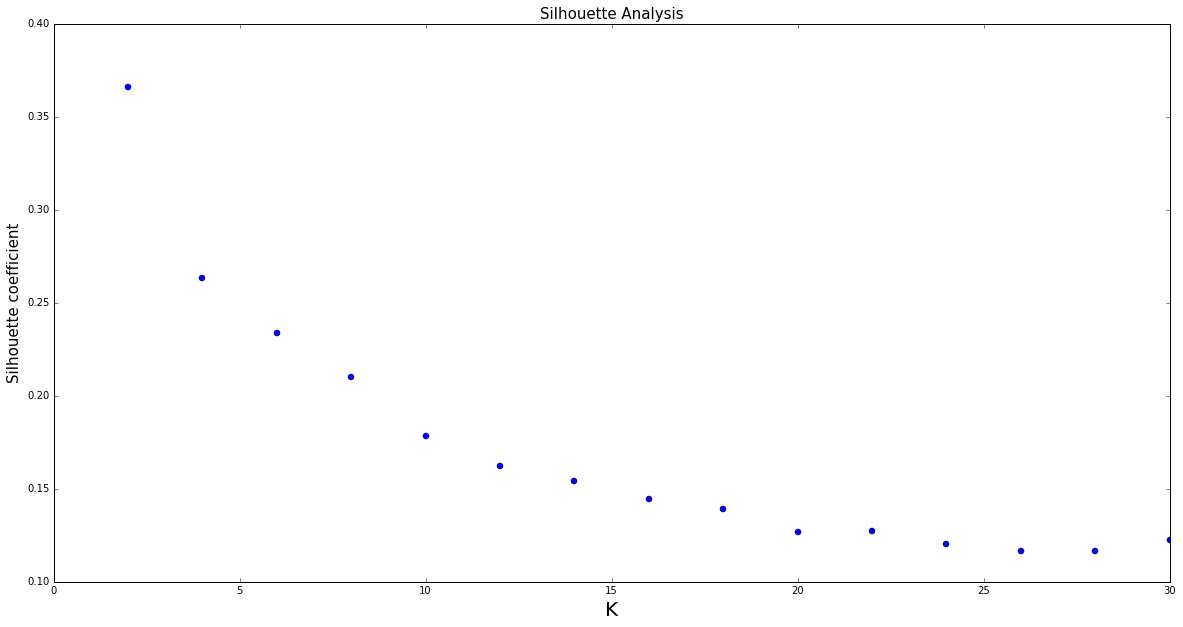

In [82]:
def silhouette_score_rev01(df,k):

    fig = plt.figure(figsize = (20, 10))
    ax = fig.add_subplot(111)
    
    k_values_array = np.array([])
    silhouette_array = np.array([])

    #k_list = [2,4,6,8,10,12]
    k_list = list(range(2,k+2,2))

    for i in k_list:
        #K-means for range of clusters 
        kmeans = KMeans(n_clusters=i, max_iter=300, random_state=3) #15 clusters and random_stat = 3 gives good cluster
        kmeans.fit(df)
        labels_kmeans = kmeans.labels_
        #Silhouette score for every k computed
        silhouette_ave = silhouette_score(df.values, labels_kmeans)
    
        #x and y axis to plot k value and silhouette score 
        k_values_array = np.append(k_values_array, [int(i)])
        silhouette_array = np.append(silhouette_array, [silhouette_ave])
    
    
    ax.set_ylabel("Silhouette coefficient", fontsize = 15)
    ax.set_xlabel("K", fontsize = 20)
    ax.set_title("Silhouette Analysis", fontsize = 15)
    
    plt.plot(k_values_array, silhouette_array, "bo")
    
    fig.savefig("Silhouette Analysis.pdf")  

silhouette_score_rev01(df5_log2_ratio,30)

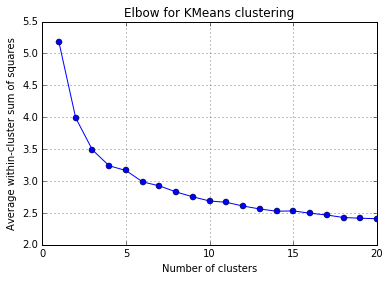

In [206]:
#breaking down the code 
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

K = range(1,21) #creating a list of k values
KM = [KMeans(n_clusters=k).fit(df5_log2_ratio) for k in K] #a list of Kmeans objects for every k in wanted range
centroids = [k.cluster_centers_ for k in KM] #list of centroids. one for every k value in the Kmeans object

D_k = [cdist(df5_log2_ratio, cent, 'euclidean') for cent in centroids] #scipy dist pacakge - euclidean distance between
                        #centroid and every samples i.e. [all dist to centroid 1(4410,1), all dist to centroid 2 (4410,1)]

dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/df5_log2_ratio.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(df5_log2_ratio)**2)/df5_log2_ratio.shape[0]
bss = tss-wcss

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'bo-')
#ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
#markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

In [205]:
#breaking down the code, non list version of the code.
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

K = 10
KM = KMeans(n_clusters=K).fit(df5_log2_ratio) #a list of Kmeans objects for every k in wanted range
centroids = KM.cluster_centers_  #list of centroids. one for every k value in the Kmeans object

D_k = cdist(df5_log2_ratio, centroids, 'euclidean')  #scipy dist pacakge - euclidean distance between
                    #centroid and every samples i.e. [all dist to centroid 1(4410,1), all dist to centroid 2 (4410,1)]

dist = np.min(D_k,axis=1) #finding the min distance for every gene and closest cluster
avgWithinSS = sum(dist)/df5_log2_ratio.shape[0] #finding the average distance between all genes and their cluster cent



In [204]:
np.min(D_k, axis = 1)

array([ 1.55213934,  4.21066156,  2.87683871, ...,  5.75432303,
        5.5675861 ,  6.46544755])

In [181]:
test_poop = [d,e,f]
test_poop[2]

array([[ 9],
       [10],
       [12]])

In [176]:
d = np.array([[1],[2],[4]])
e = np.array([[4],[7],[8]])
f = np.array([[9],[10],[12]])

In [165]:
a

array([1, 2, 3])

In [143]:
test_1234.shape

(4410, 16)

In [139]:
test_1234

array([[  2.2339132 ,  12.97464778,   7.83023736, ...,  18.30136583,
         10.00417485,   2.3595104 ],
       [  7.07983545,   6.42528845,  16.20780134, ...,  25.19376237,
         14.8166042 ,  10.81281387],
       [  8.70372826,   4.08201797,  18.24475261, ...,  26.62166764,
         17.13546479,  12.66581937],
       ..., 
       [ 16.98190292,   7.71869749,  26.15048839, ...,  32.28078148,
         24.00824907,  20.76831198],
       [ 10.73286522,   5.65639063,  19.55262788, ...,  26.30609159,
         19.25355064,  14.31457431],
       [ 10.72810369,   6.90968809,  19.23255067, ...,  27.1127181 ,
         19.05237975,  14.19336835]])

In [130]:
test_1234_argmin = np.argmin(test_1234, axis = 1)

In [131]:
test_1234_argmin_df = pd.DataFrame(test_1234_argmin)

In [134]:
test_1234_argmin.shape

(4410,)

In [132]:
test_1234_argmin_df

,0
0,1
1,0
2,0
3,1
4,0
5,0
6,1
7,1
8,1
9,0


In [105]:
test_1234_df = pd.DataFrame(test_1234)

In [106]:
test_1234_df

,0
0,1.768273
1,7.630295
2,9.303269
3,3.508475
4,2.934322
5,6.047128
6,3.550764
7,3.335777
8,5.094142
9,3.315574


In [100]:
whooop = [1,2,3,4,5,6,7]
whooop[0]

1

In [89]:
cdist?

In [ ]:
#Stolen code from the interwebs
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

K = range(1,50)
KM = [KMeans(n_clusters=k).fit(dt_trans) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(dt_trans, cent, 'euclidean') for cent in centroids]

cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/dt_trans.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(dt_trans)**2)/dt_trans.shape[0]
bss = tss-wcss

kIdx = 10-1

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

In [119]:
#Mary has a list of genes that are known to be Cu repressible. 
# genes #43 - 52 should be in a single cluster. 
# genes #53 - 56 & #42 should be in another

Marys_list = ["MBURv2_130042",
"MBURv2_130043",
"MBURv2_130044",
"MBURv2_130045",
"MBURv2_130046",
"MBURv2_130047",
"MBURv2_130048",
"MBURv2_130049",
"MBURv2_130050",
"MBURv2_130051",
"MBURv2_130052",
"MBURv2_130053",
"MBURv2_130054",
"MBURv2_130055",
"MBURv2_130056"]

df6_clusters.loc[Marys_list,:]

,5GB1_FM12_TR1,5GB1_FM12_TR2,5GB1_FM14_TR1,5GB1_FM14_TR2,5GB1_FM18_TR2,5GB1_FM18_TR3,5GB1_FM19_TR1,5GB1_FM19_TR1_UW,5GB1_FM19_TR3,5GB1_FM20_TR3,...,5GB1_FM40_T150m_TR1_remake,5GB1_FM40_T180m_TR1,5GB1_FM34_T0_TR1_QC,5GB1_FM34_T3_TR3_QC,5GB1_FM34_T4_TR3_QC,5GB1_FM34_T5_TR2_QC,5GB1_FM34_T6_TR3_QC,5GB1_FM34_T7_TR3_QC,5GB1_FM34_T8_TR1_QC,cluster
locus_tag,,,,,,,,,,,,,,,,,,,,,
MBURv2_130042,-2.263358,-2.160109,-2.432761,-2.573584,0.512478,0.306624,-0.597376,-0.732201,-0.649651,-0.562716,...,-0.207115,-1.036101,0.572360,-1.230231,-1.032833,-0.741048,-0.995425,-0.771119,-0.868924,25
MBURv2_130043,-1.461884,-1.435914,-1.242768,-1.510753,0.053738,-0.324754,-0.798842,-0.879423,-0.772361,-0.841925,...,4.421217,-0.603110,6.411282,-0.481060,-0.891651,-0.917032,-0.857281,-1.128500,-0.837758,8
MBURv2_130044,-1.158995,-1.418332,-0.877443,-1.014105,-0.003614,0.709302,-1.539010,-1.201301,-1.191911,-0.931315,...,4.676260,-0.339794,6.873292,-0.466232,-0.843808,-1.313195,-0.598870,-0.898595,-0.591077,8
MBURv2_130045,-0.757943,-0.905771,-0.292680,-0.483121,0.378331,0.555634,-0.429971,-0.464924,-0.590757,0.077329,...,5.609980,0.703425,7.676034,0.002538,0.330515,0.113755,-0.567506,-0.056608,0.140727,8
MBURv2_130046,-0.491639,-0.348879,-0.317692,-0.417518,0.032318,0.102818,-0.772363,-0.698880,-0.586366,-0.048134,...,6.306600,1.234106,8.028358,0.819344,0.289949,0.653526,0.534886,0.232355,0.151971,8
MBURv2_130047,-1.575526,-1.571865,-1.683787,-1.735227,-0.811752,-0.749821,-1.391264,-1.207434,-1.358083,-1.376769,...,5.296699,0.146374,6.903886,-0.113486,-0.501046,-0.680927,-0.634621,-0.870148,-0.717801,8
MBURv2_130048,-0.170275,-0.026129,-0.222399,-0.426714,0.143003,0.159916,-0.436481,-0.205525,-0.343038,0.115260,...,7.784977,1.945075,9.780838,1.931199,1.263560,1.418609,1.480208,0.819079,0.841815,8
MBURv2_130049,0.351518,0.239509,0.443723,0.339483,0.255934,0.776646,0.364560,0.327411,0.149809,0.874237,...,9.017179,3.167415,11.043591,3.000076,2.325557,2.168631,2.217822,1.904292,2.162422,8
MBURv2_130050,0.163059,0.339334,-0.072028,-0.100873,0.458801,0.420688,-0.120867,0.068728,-0.074848,0.541936,...,8.555966,2.471979,10.225825,2.367582,1.655315,1.294551,1.308436,1.164831,1.383811,8


In [120]:
#List of genes that appear to be interesting

df3_TPM.loc[['MBURv2_160425',
 'MBURv2_200002',
 'MBURv2_210001',
 'MBURv2_210002',
 'MBURv2_210003',
 'MBURv2_210005',
 'MBURv2_210007',
 'MBURv2_60380'],:]

,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,5GB1_FM12_TR1,5GB1_FM12_TR2,...,5GB1_FM40_T90m_TR2,5GB1_FM40_T150m_TR1_remake,5GB1_FM40_T180m_TR1,5GB1_FM34_T0_TR1_QC,5GB1_FM34_T3_TR3_QC,5GB1_FM34_T4_TR3_QC,5GB1_FM34_T5_TR2_QC,5GB1_FM34_T6_TR3_QC,5GB1_FM34_T7_TR3_QC,5GB1_FM34_T8_TR1_QC
locus_tag,,,,,,,,,,,,,,,,,,,,,
MBURv2_160425,exported protein of unknown function,CDS,NaN,MBURv2,3741467,3742831,Evidence 5 : No homology to any previously rep...,NaN,19.549862,21.375368,...,1607.370121,2105.257280,733.821397,1671.229560,265.498526,67.484247,45.049855,41.411652,39.283910,34.957819
MBURv2_200002,conserved protein of unknown function,CDS,NaN,MBURv2,4089082,4089993,Evidence 4 : Homologs of previously reported g...,NaN,26.706377,23.539627,...,26024.515218,25707.369485,19990.740574,34926.035642,10455.543012,2405.313680,882.847248,517.376466,379.658311,287.596293
MBURv2_210001,protein of unknown function,CDS,NaN,MBURv2,4091285,4091434,Evidence 5 : No homology to any previously rep...,NaN,6.260115,5.777159,...,6152.505988,7225.089637,4093.143607,5600.605908,2302.470810,734.071669,435.495965,291.096635,242.861859,237.007065
MBURv2_210002,conserved exported protein of unknown function,CDS,NaN,MBURv2,4091448,4091843,Evidence 4 : Homologs of previously reported g...,NaN,36.193819,40.545811,...,13239.511781,12188.596640,8935.398178,13908.254039,6990.127544,2053.153132,1129.568869,715.433063,652.119514,594.113671
MBURv2_210003,conserved exported protein of unknown function,CDS,NaN,MBURv2,4092017,4092586,Evidence 4 : Homologs of previously reported g...,NaN,16.141954,17.712987,...,3760.011081,3579.523598,2485.405153,2452.387614,1216.587301,380.590779,242.651711,160.334744,149.922102,123.908957
MBURv2_210005,conserved protein of unknown function,CDS,NaN,MBURv2,4094354,4095007,Evidence 4 : Homologs of previously reported g...,NaN,1.279982,1.275035,...,205.248530,204.943097,163.746918,200.081041,90.819431,25.112817,15.524554,17.597051,13.535129,14.254248
MBURv2_210007,putative Bacterial type II secretion system pr...,CDS,NaN,MBURv2,4097453,4098670,Evidence 3 : Function proposed based on presen...,NaN,2.480188,2.275370,...,196.167277,158.273553,141.259315,142.723411,64.978894,21.926518,18.401770,11.949780,13.696689,8.561832
MBURv2_60380,Copper-repressible polypeptide,CDS,corA,MBURv2,1788771,1789478,NaN,NaN,505.894380,519.323061,...,13671.508292,12265.626813,10985.775012,15449.145528,12016.646074,8605.440728,7524.692328,5830.251394,5495.216016,5040.082454


In [ ]:
df6_clusters.columns

# Plotting the resulting clusters

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

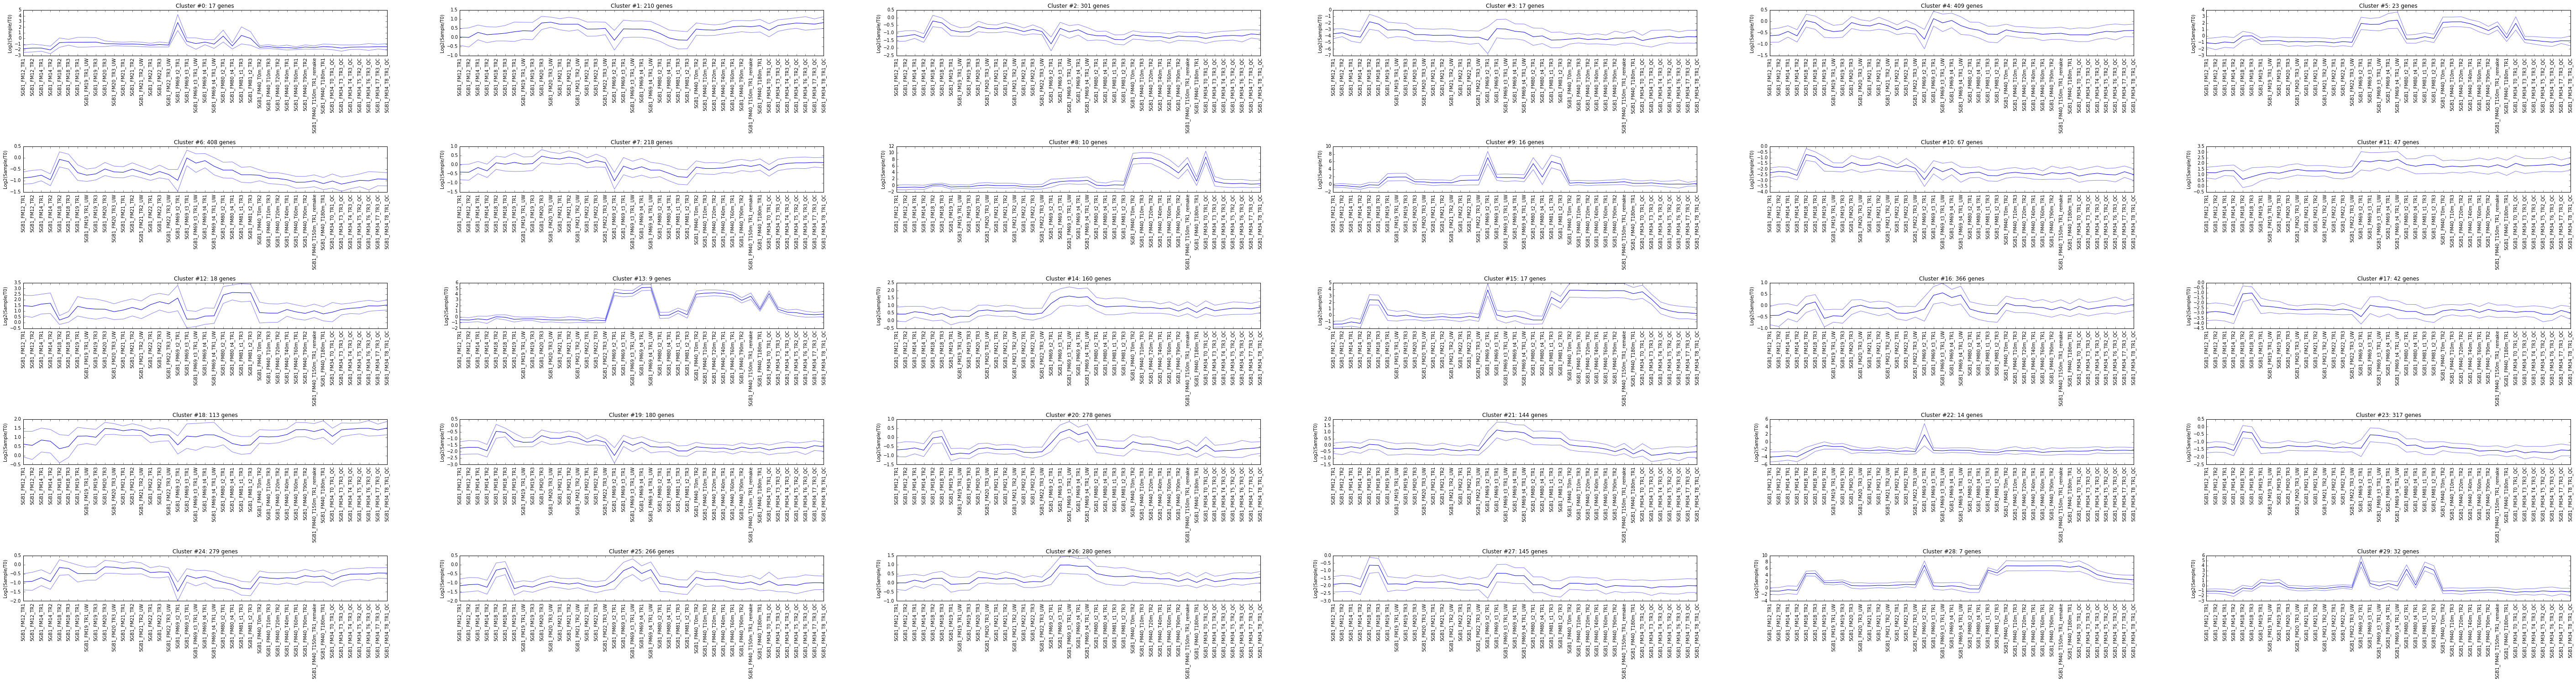

In [121]:
def draw_clust_means(df, n_rows, n_cols):
    
    """
    Draw scatter plot of mean gene expression level for genes in that cluster.
    Will include 1 standard deviation error margin within the plot. 
    Plot will be saves as pdf file. 
    
    
    df: daframe with locus tag as index, and "cluster" column with cluster number for each gene. 
    n_rows: int value for the subplot grid
    n_cols: int value for subplot grid
    
    """
    
    fig = plt.figure(figsize = (100, 50))
    x_axis = list(range(len(df.columns)-1))
    x_ticks = df.loc[:, df.columns != "cluster"]
    
    y_stdev = df.groupby("cluster").std()
    y_mean = df.groupby("cluster").mean()
    
    y_low = y_mean.subtract(y_stdev, fill_value=0)
    y_high = y_mean.add(y_stdev, fill_value = 0)
    
    count = df.groupby("cluster").count().iloc[:,0]
    
    for i in range(y_mean.shape[0]):
        y = y_mean.values[i]
        y_hi = y_high.values[i]
        y_lo = y_low.values[i]
        
        title_str = "Cluster #"+ str(i) + ": " + str(count[i]) + " genes"
        
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        ax.set_xticks(x_axis)
        ax.set_xticklabels(x_ticks, rotation = "vertical")
        ax.set_title(title_str)
        ax.set_ylabel("Log2(Sample/T0)")
        
        ax.plot(x_axis, y, "b-")
        ax.plot(x_axis, y_hi, "b-", alpha = 0.5)
        ax.plot(x_axis, y_lo, "b-", alpha = 0.5 )
        
    fig.subplots_adjust(hspace = 2)
    plt.show()
    fig.savefig("cluster_means.pdf")
    
    
testa = df6_clusters #.iloc[:500,:]
draw_clust_means(testa, 10, 6 )

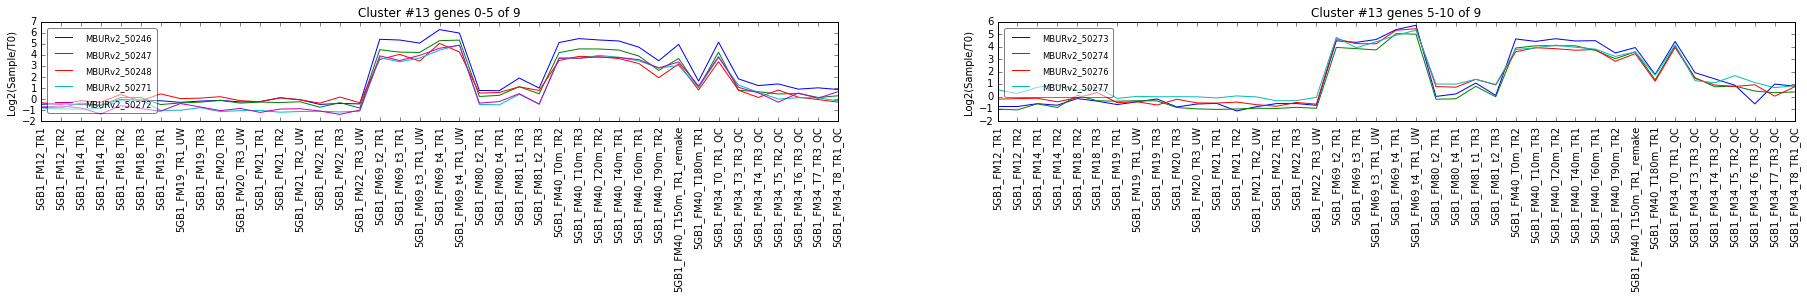

In [126]:
def draw_clst_genes(df, clst):
    
    """
    Plots the expression profile of each gene in a specified cluster. Creates subplots with 5 genes per subplot. 
    
    
    df: dataframe with normalized read counts for each sample and a "cluster" column with cluster id #
    clst: int value of the cluster number the genes of which need to be plotting across samples. 
    """
    

    fig = plt.figure(figsize = (100, 50))
    x_axis = list(range(len(df.columns)-1))
    x_ticks = df.loc[:, df.columns != "cluster"]
    
    clst_index = df.loc[df["cluster"] == clst,:].index
    
    n_cols = 6
    n_rows = 10
    
    count_subplots = 1
    for i, val in enumerate(clst_index):
        
        if i % 5 == 0:
            ax = fig.add_subplot(n_rows, n_cols, count_subplots)
            count_subplots += 1
            title_str = "Cluster #"+ str(clst) + " genes " + str(i) + "-" + str(i + 5) +" of " + str(len(clst_index))
             
        y = df.loc[val, (df.columns != "cluster")].values
        ax.set_xticks(x_axis)
        ax.set_xticklabels(x_ticks, rotation = "vertical")
        ax.set_title(title_str)
        ax.set_ylabel("Log2(Sample/T0)")
        
        ax.plot(x_axis,y, label = str(val))
        leg = ax.legend(fancybox = True ,loc='upper left')
        leg.get_frame().set_alpha(0.5) #translucent 
        
        for label in leg.get_texts():
            label.set_fontsize('small')
        
    fig.subplots_adjust(hspace = 2)
    plt.show()
    fig.savefig("cluster " + str(clst) + " genes.pdf")
    return list(clst_index) #returns a list 
    
testa = df6_clusters #.iloc[:500,:]
the_list = draw_clst_genes(testa, 13)

In [128]:
df2_cleaned_up.loc[the_list,:]

,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,5GB1_FM12_TR1,5GB1_FM12_TR2,...,5GB1_FM40_T90m_TR2,5GB1_FM40_T150m_TR1_remake,5GB1_FM40_T180m_TR1,5GB1_FM34_T0_TR1_QC,5GB1_FM34_T3_TR3_QC,5GB1_FM34_T4_TR3_QC,5GB1_FM34_T5_TR2_QC,5GB1_FM34_T6_TR3_QC,5GB1_FM34_T7_TR3_QC,5GB1_FM34_T8_TR1_QC
locus_tag,,,,,,,,,,,,,,,,,,,,,
MBURv2_50246,Methyl-accepting chemotaxis sensory transducer,CDS,NaN,MBURv2,1107498,1109417,NaN,NaN,3.078497,3.159384,...,46.882355,130.378770,13.115847,150.088027,15.075104,9.892949,10.975201,7.933230,8.600175,7.735647
MBURv2_50247,CheW protein,CDS,NaN,MBURv2,1109448,1111046,NaN,NaN,3.732925,3.619799,...,37.688074,79.590240,12.846896,118.225378,10.936285,9.914022,8.625913,8.890774,6.919930,7.707547
MBURv2_50248,Chemotaxis response regulator protein-glutamat...,CDS,cheB,MBURv2,1111100,1112152,NaN,NaN,4.790587,4.262297,...,22.881685,54.317349,10.595851,62.480543,10.450926,6.645736,10.551656,6.750402,5.819838,4.951715
MBURv2_50271,Methyl-accepting chemotaxis sensory transducer,CDS,NaN,MBURv2,1135657,1136868,NaN,NaN,7.075002,6.657547,...,87.058616,100.131508,25.294445,166.108544,29.727308,18.853531,12.328578,13.405325,13.343132,10.950822
MBURv2_50272,Response regulator receiver protein,CDS,NaN,MBURv2,1136881,1137249,NaN,NaN,8.758717,9.371599,...,101.408585,147.990263,32.921529,206.033400,30.231915,21.286863,11.940499,21.097947,15.223846,23.122641
MBURv2_50273,Anti-sigma-factor antagonist,CDS,NaN,MBURv2,1137261,1137584,NaN,NaN,3.617135,3.608201,...,71.175986,96.184347,21.563052,134.472013,23.729330,16.749966,11.825132,4.178820,12.609650,11.216384
MBURv2_50274,CheA signal transduction histidine kinase,CDS,NaN,MBURv2,1137581,1139749,NaN,NaN,4.446724,4.266646,...,73.396579,107.947044,22.715521,149.574790,25.576939,15.407481,15.986008,12.172332,11.066145,11.582641
MBURv2_50276,CheW protein,CDS,NaN,MBURv2,1142854,1143414,NaN,NaN,9.731556,10.055089,...,80.274965,122.731114,26.394043,172.787101,30.902619,21.384139,19.805515,21.720928,11.530749,19.433734
MBURv2_50277,conserved protein of unknown function,CDS,NaN,MBURv2,1143477,1143746,Evidence 4 : Homologs of previously reported g...,NaN,16.715209,13.625374,...,107.569746,137.620755,37.847984,204.686258,27.916858,24.860476,36.894412,25.072923,18.914475,21.067295


In [123]:
def draw_gene_list(df, gene_list):
    
    fig = plt.figure(figsize = (20, 10))
    ax = fig.add_subplot(111)
    
    x_axis = list(range(len(df.columns)-1))
    x_ticks = df.loc[:, df.columns != "cluster"]
    
    title_str = "Select gene expression across samples"
    
    for i in gene_list:
        y = df.loc[i, (df.columns != "cluster")].values
        ax.plot(x_axis, y, label = str(i))
        
        leg = ax.legend(fancybox = True ,loc='upper left')
        
        ax.set_xticks(x_axis)
        ax.set_xticklabels(x_ticks, rotation = "vertical")
        #ax.set_title(title_str, fontsize = 50)
        ax.set_ylabel("Log2(Sample/T0)", fontsize = 15)
        
    fig.suptitle(title_str, fontsize = 20)
    plt.show()
    fig.savefig("list_of_genes.pdf")    

In [ ]:
the_list

In [124]:
Cu_repres_conserved = ["MBURv2_130042",
"MBURv2_130043",
"MBURv2_130044",
"MBURv2_130045",
"MBURv2_130046",
"MBURv2_130047",
"MBURv2_130048",
"MBURv2_130049",
"MBURv2_130050",
"MBURv2_130051"]


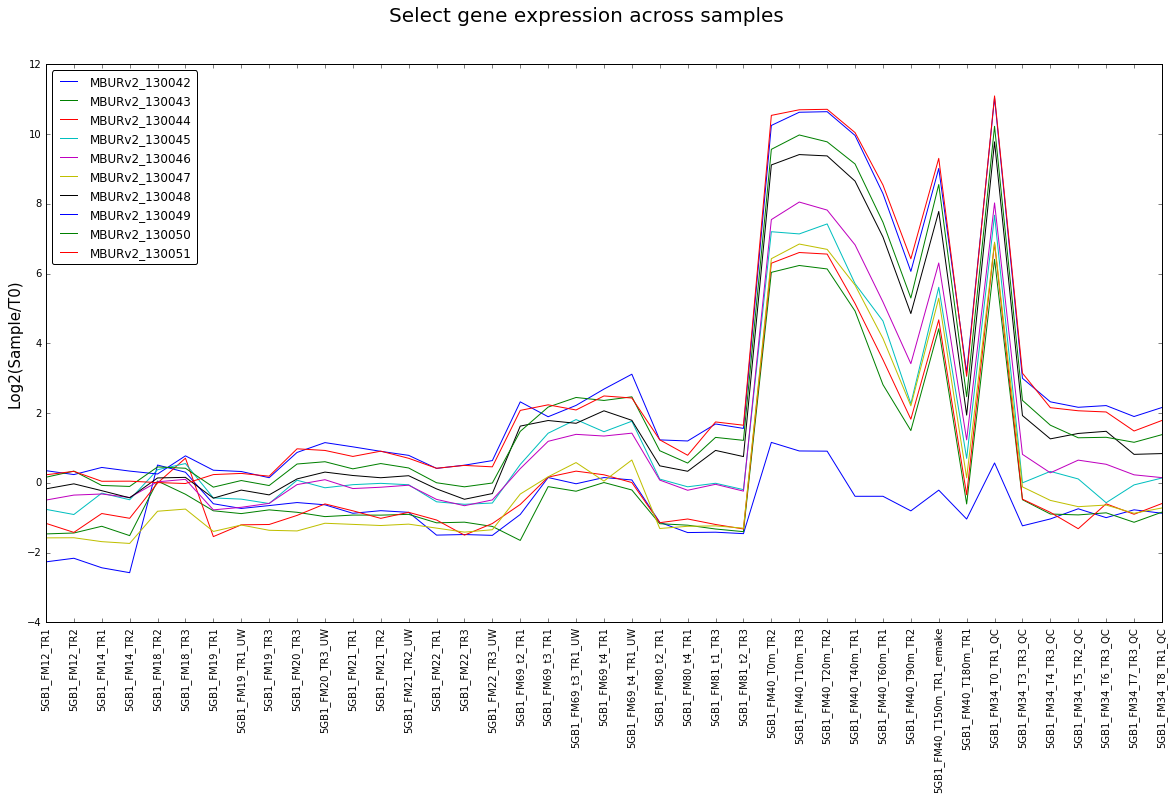

In [125]:
#list of Cu repressible genes (including genes not conserved in other methanotrophs)
draw_gene_list(testa, Cu_repres_conserved)


In [ ]:
#which gene is low?
draw_gene_list(testa, ["MBURv2_130042"])

In [ ]:
#Cu repressible genes not conserved in other methanotrophs 
Cu_repres_not_conserved = ["MBURv2_130052",
"MBURv2_130053",
"MBURv2_130054",
"MBURv2_130055",
"MBURv2_130056"]


In [ ]:
draw_gene_list(testa, Cu_repres_not_conserved)

In [ ]:
#which gene is high? 

draw_gene_list(testa, ["MBURv2_130052"])


In [ ]:
#which cluster do these genes belong to?

In [ ]:
Marys_list = ["MBURv2_130042",
"MBURv2_130043",
"MBURv2_130044",
"MBURv2_130045",
"MBURv2_130046",
"MBURv2_130047",
"MBURv2_130048",
"MBURv2_130049",
"MBURv2_130050",
"MBURv2_130051",
"MBURv2_130052",
"MBURv2_130053",
"MBURv2_130054",
"MBURv2_130055",
"MBURv2_130056"]

df6_clusters.loc[Marys_list,:]


# Going to try to cluster with HDBSCAN just for giggles

In [ ]:
"""
import hdbscan
X = df5_log2_ratio
HDBSCAN = hdbscan.HDBSCAN(metric = "euclidean", min_cluster_size=5)
HDBSCAN.fit(X)
labels = HDBSCAN.labels_



print(np.unique(labels)) # unique bins, zero is noise
print(np.bincount(labels[labels!=-1])) 
"""